Processing files: ['AAPL.csv', 'AAPL_final_metrics.csv', 'AMZN.csv', 'GOOG.csv', 'META.csv', 'MSFT.csv', 'NVDA.csv']
Saved: ../data/processed\AAPL_analyzed.csv
Saved: ../data/processed\AAPL_final_metrics_analyzed.csv
Saved: ../data/processed\AMZN_analyzed.csv
Saved: ../data/processed\GOOG_analyzed.csv
Saved: ../data/processed\META_analyzed.csv
Saved: ../data/processed\MSFT_analyzed.csv
Saved: ../data/processed\NVDA_analyzed.csv


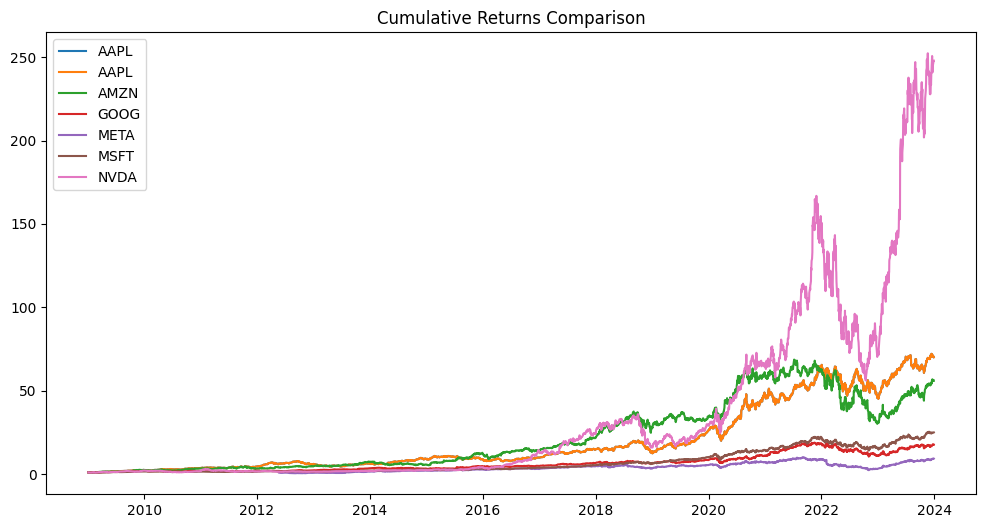

In [1]:
import pandas as pd
import talib
import os
import matplotlib.pyplot as plt

# 1. Setup Folders
data_folder = '../data'
output_folder = '../data/processed'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 2. Batch Process All Stocks
files = [f for f in os.listdir(data_folder) if f.endswith('.csv') and 'raw' not in f and 'analyzed' not in f]

print(f"Processing files: {files}")

for file in files:
    try:
        # Load Data
        df = pd.read_csv(os.path.join(data_folder, file), index_col=0, parse_dates=True)
        if 'Close' not in df.columns: continue
        
        # Sort and Fill
        df = df.sort_index().ffill().bfill()
        
        # Indicators
        close = df['Close'].values
        df['SMA_20'] = talib.SMA(close, timeperiod=20)
        df['RSI'] = talib.RSI(close, timeperiod=14)
        macd, macdsignal, macdhist = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9)
        df['MACD'] = macd
        
        # Financial Metrics
        df['Daily_Return'] = df['Close'].pct_change()
        df['Cumulative_Return'] = (1 + df['Daily_Return']).cumprod()
        df['Volatility'] = df['Daily_Return'].rolling(window=20).std()
        
        # Save
        output_path = os.path.join(output_folder, file.replace('.csv', '_analyzed.csv'))
        df.to_csv(output_path)
        print(f"Saved: {output_path}")
        
    except Exception as e:
        print(f"Error processing {file}: {e}")

# 3. Visualize
processed_files = [f for f in os.listdir(output_folder) if f.endswith('_analyzed.csv')]
plt.figure(figsize=(12, 6))
for file in processed_files:
    df = pd.read_csv(os.path.join(output_folder, file), index_col=0, parse_dates=True)
    ticker = file.split('_')[0]
    plt.plot(df.index, df['Cumulative_Return'], label=ticker)

plt.title('Cumulative Returns Comparison')
plt.legend()
plt.show()